In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import pickle
import cv2
%matplotlib inline

In [3]:
# get the params of camera calibration
with open('./output_images/wide_dist_pickle.p','rb') as p:
    dist_data = pickle.load(p)
    mtx = dist_data['mtx']
    dist = dist_data['dist']

In [4]:
def get_undistort(img):
    return cv2.undistort(img, mtx, dist, None, mtx)

In [5]:
test_imgs = glob.glob('./test_images/*.jpg')
length = len(test_imgs)
length

8

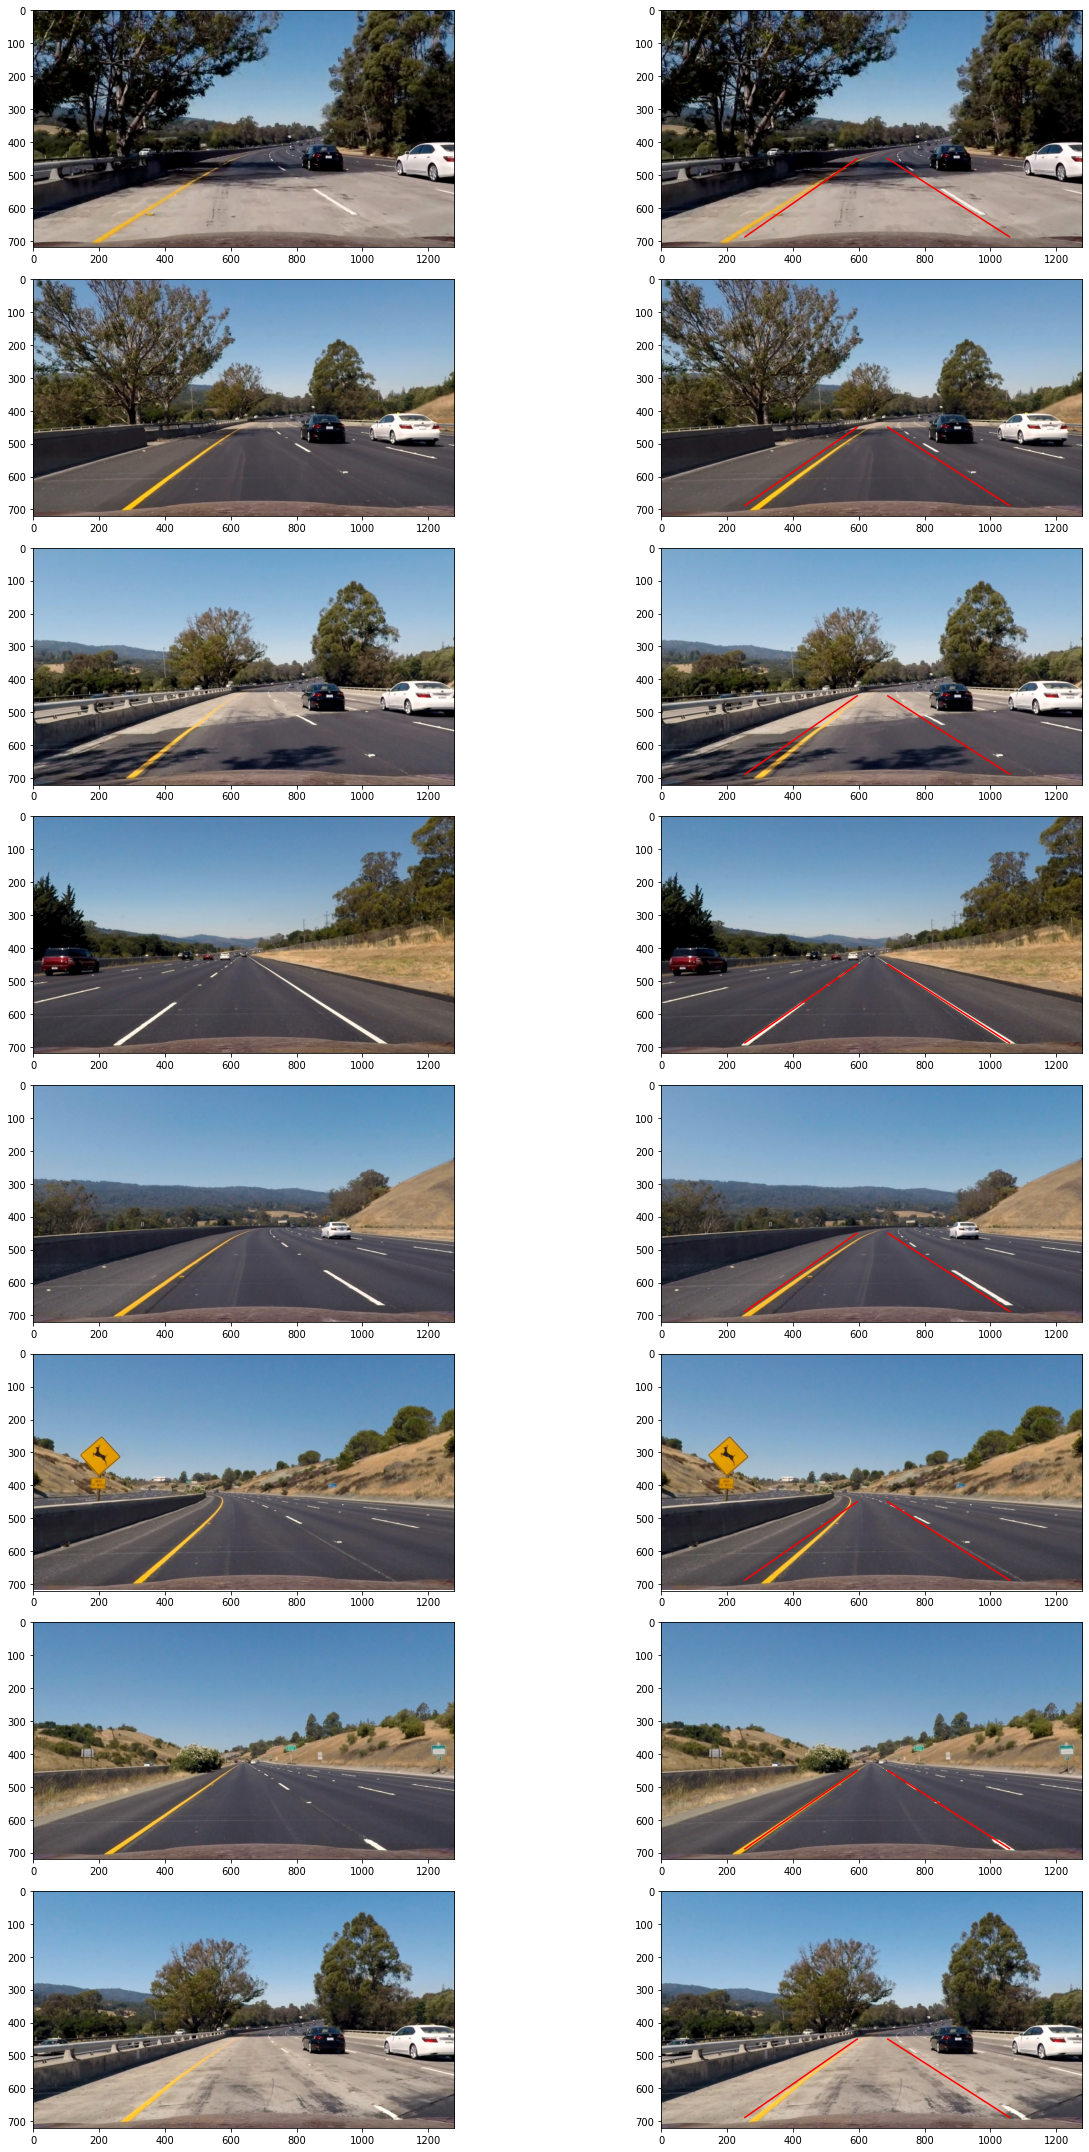

In [6]:
f, axes = plt.subplots(length, 2, figsize=(20,30))

line_left_x = [254, 595]
line_left_y = [688, 450]
line_right_x = [688, 1058]
line_right_y = [450, 688]

for i in range(length):
    img = mpimg.imread(test_imgs[i])
    img = get_undistort(img)
    axes[i][0].imshow(img)
    axes[i][1].imshow(img)
    axes[i][1].plot(line_left_x,line_left_y,color='red')
    axes[i][1].plot(line_right_x, line_right_y, color='red')
    
    
plt.tight_layout()